In [2]:
!pip install --upgrade prophet
!pip install --upgrade pystan


  Using cached prophet-1.1.4-py3-none-win_amd64.whl (12.9 MB)
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.3
    Uninstalling prophet-1.1.3:
      Successfully uninstalled prophet-1.1.3
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-5.0.2-cp38-cp38-win_amd64.whl (156 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp38-cp38-win_amd64.whl (151 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)


In [3]:
!pip install holidays==0.25

In [4]:
!pip install prophet==1.1.3

  Using cached prophet-1.1.3-py3-none-win_amd64.whl (12.1 MB)
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.4
    Uninstalling prophet-1.1.4:
      Successfully uninstalled prophet-1.1.4


In [5]:
!pip install matplotlib seaborn

In [6]:
!pip install numpy


In [7]:
!pip install --upgrade numpy

In [8]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmdstanpy
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split

cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)

Importing plotly failed. Interactive plots will not work.


Installing CmdStan version: 2.32.2
Install directory: C:\Users\muham\.cmdstan
CmdStan version 2.32.2 already installed


09:59:00 - cmdstanpy - INFO - Add C++ toolchain to $PATH: C:\Users\muham\.cmdstan\RTools40


Installing CmdStan version: 2.32.2
Install directory: C:\Users\muham\.cmdstan
CmdStan version 2.32.2 already installed


True

In [9]:
data = pd.read_csv("station_rio.csv")

In [10]:
data.head(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66,26.28,23.89,21.08,23.67,23.73
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,25.07,23.74,21.00,23.46,23.32
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,26.22,25.29,21.74,22.78,24.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73,27.50,24.33,20.78,23.64,24.06
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98,25.93,23.10,22.03,24.02,23.77


In [11]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1996.000000,110.087021,151.711064,88.692128,87.341277,105.961702,84.027234,104.484255,105.158298,105.589362,86.071064,107.822553,129.836170,109.842979,87.073191,104.832340,85.992979,107.322128
std,13.711309,274.327517,327.980278,240.504860,240.862668,275.597282,241.736716,276.053390,275.845350,275.712484,241.197722,275.024153,303.447244,274.400877,240.931949,275.945192,241.217247,275.177349
min,1973.000000,23.860000,25.690000,24.800000,22.730000,21.370000,19.740000,19.240000,19.950000,20.530000,21.620000,23.040000,24.540000,25.070000,23.100000,20.110000,22.330000,23.310000
25%,1984.500000,26.715000,27.185000,26.220000,24.580000,22.300000,20.920000,20.655000,21.240000,21.785000,23.050000,24.335000,25.715000,26.515000,24.490000,21.165000,23.065000,23.985000
50%,1996.000000,27.480000,27.960000,26.570000,25.090000,22.870000,21.500000,21.320000,22.070000,22.440000,23.670000,24.850000,26.170000,27.070000,24.780000,21.720000,23.670000,24.330000
75%,2007.500000,28.575000,28.530000,27.220000,26.010000,23.395000,22.670000,21.970000,22.660000,23.280000,24.700000,25.650000,27.115000,27.850000,25.490000,22.195000,24.330000,24.805000
max,2019.000000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000


In [12]:
data = data.drop(columns=['D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'], axis=1)

### Look at Correlation Table if there are many features

### df = data.copy() diyip datanın kopyasını alıp öyle devam etmek daha sonrasında datanın orjinaldeki haline ihtiyaç duyduğumuzda kolayca ulaşabilmemize olanak sağlıyor (df = data ile df=data.copy aynı değil .copy daha iyi oluyo bazen bozulmalar olabilir diğerinde)

In [13]:
df = data.copy()

In [14]:
df.head(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98


In [15]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [16]:
# Veri setini DataFrame'e dönüştürelim
df = pd.DataFrame(df)

# Seçmek istediğiniz sütunları belirleyin
selected_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Sadece istediğiniz sütunları içeren yeni bir DataFrame oluşturun
selected_df = df[selected_columns]


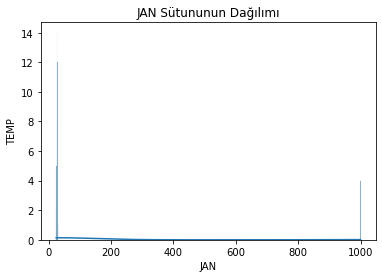

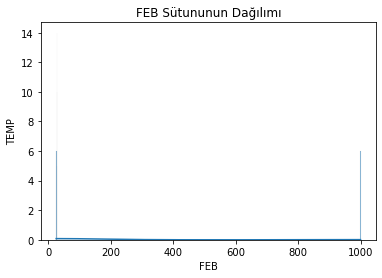

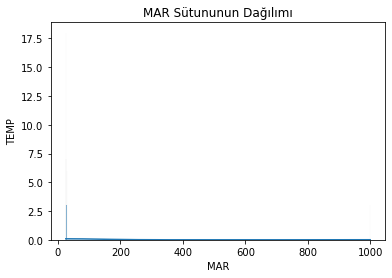

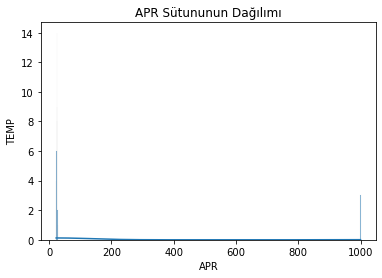

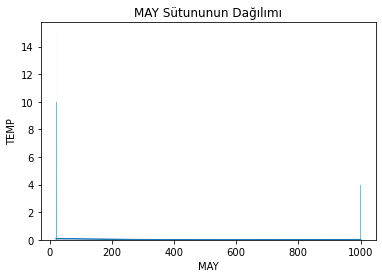

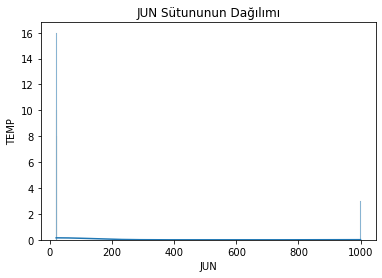

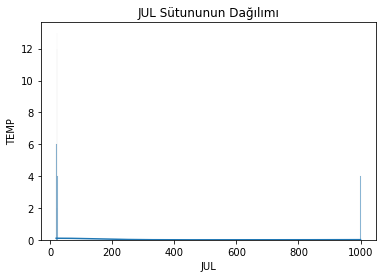

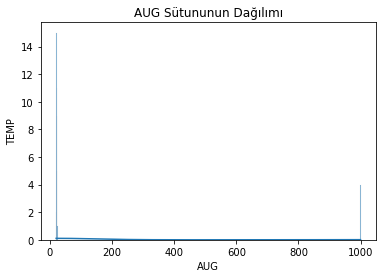

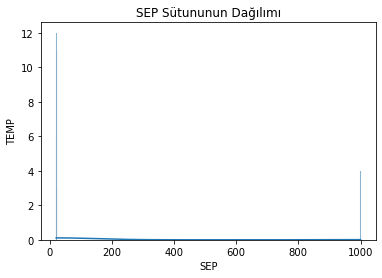

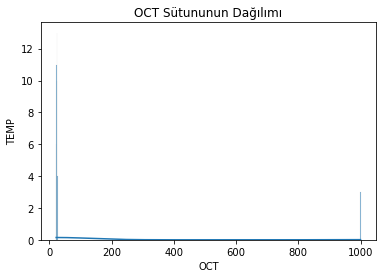

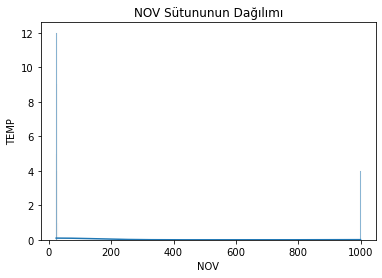

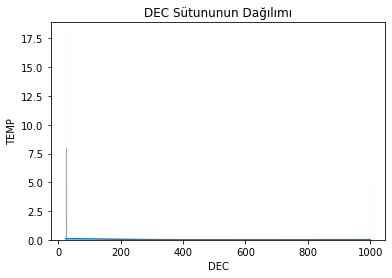

In [17]:
# Veri setindeki sütunların dağılımlarına bakın
for column in selected_df.columns:
    sns.histplot(selected_df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel("TEMP")
    plt.title(f"{column} Sütununun Dağılımı")
    plt.show()

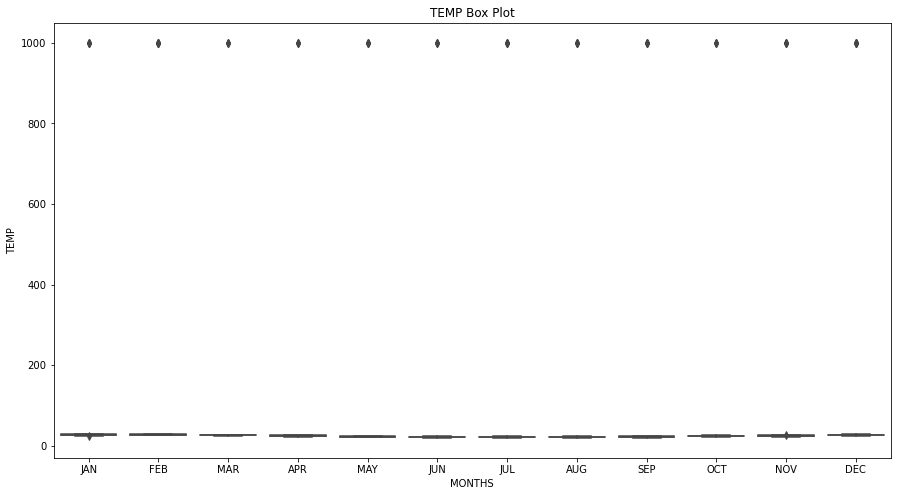

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(data=selected_df)
plt.xlabel("MONTHS")
plt.ylabel("TEMP")
plt.title("TEMP Box Plot")
plt.show()


In [19]:
null_counts = df.isnull().sum()
null_counts

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

In [20]:
df.replace(999.90, np.nan, inplace = True)

null_counts = df.isnull().sum()

total_null_values = df.isnull().sum().sum()

print(null_counts)

print("Total null values in the DataFrame:", total_null_values)

YEAR    0
JAN     4
FEB     6
MAR     3
APR     3
MAY     4
JUN     3
JUL     4
AUG     4
SEP     4
OCT     3
NOV     4
DEC     5
dtype: int64
Total null values in the DataFrame: 47


In [21]:
# Veri setini DataFrame'e dönüştürelim
df = pd.DataFrame(df)

selected_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Sadece istediğiniz sütunları içeren yeni bir DataFrame oluşturun
selected_df = df[selected_columns]


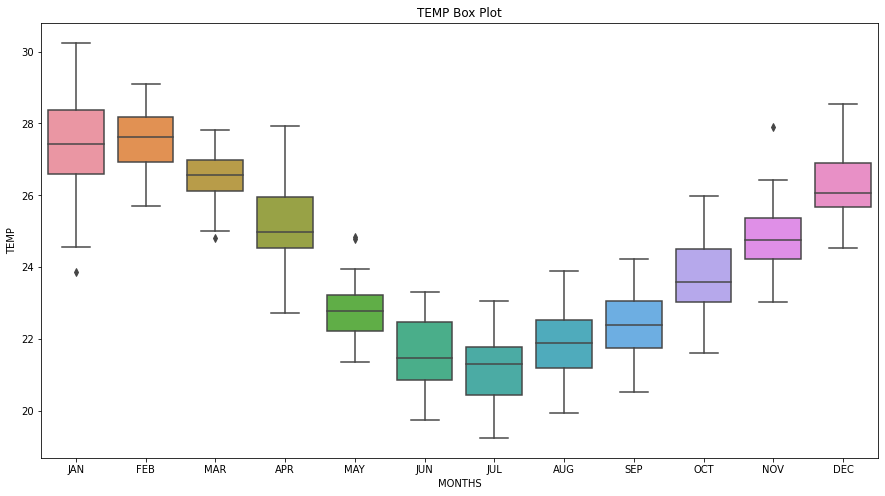

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(data=selected_df)
plt.xlabel("MONTHS")
plt.ylabel("TEMP")
plt.title("TEMP Box Plot")
plt.show()

In [23]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,47.000000,43.000000,41.000000,44.000000,44.000000,43.000000,44.000000,43.000000,43.000000,43.000000,44.000000,43.000000,42.000000
mean,1996.000000,27.313721,27.585854,26.564318,25.121364,22.804651,21.581364,21.189767,21.926512,22.397674,23.764545,24.838605,26.257143
std,13.711309,1.357475,0.898176,0.771936,1.117438,0.784078,0.955407,0.995295,0.920238,0.929544,1.069774,0.975513,0.902609
min,1973.000000,23.860000,25.690000,24.800000,22.730000,21.370000,19.740000,19.240000,19.950000,20.530000,21.620000,23.040000,24.540000
25%,1984.500000,26.600000,26.920000,26.132500,24.542500,22.230000,20.852500,20.450000,21.190000,21.760000,23.037500,24.235000,25.670000
50%,1996.000000,27.420000,27.630000,26.560000,24.980000,22.780000,21.460000,21.300000,21.880000,22.400000,23.595000,24.750000,26.060000
75%,2007.500000,28.365000,28.180000,26.977500,25.940000,23.210000,22.477500,21.780000,22.525000,23.050000,24.500000,25.375000,26.905000
max,2019.000000,30.250000,29.100000,27.830000,27.930000,24.850000,23.310000,23.070000,23.900000,24.220000,25.970000,27.910000,28.530000


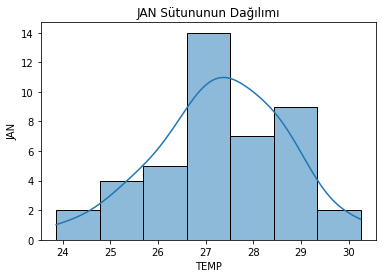

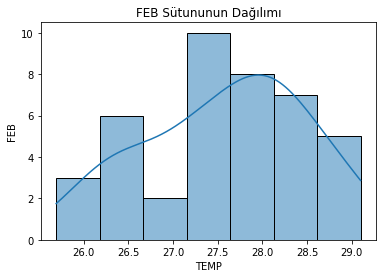

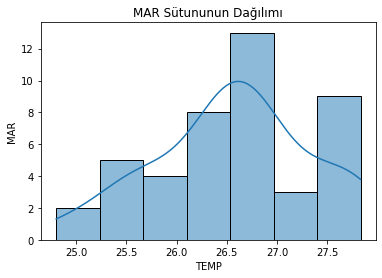

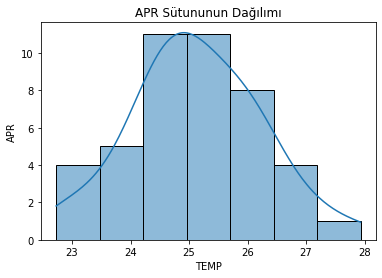

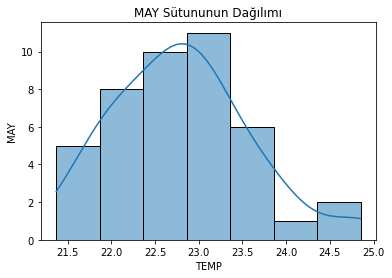

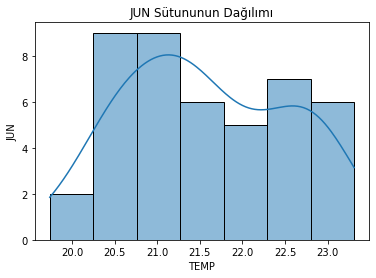

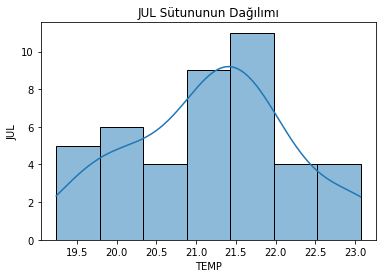

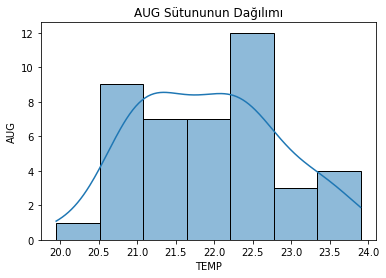

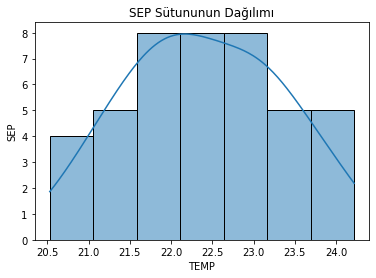

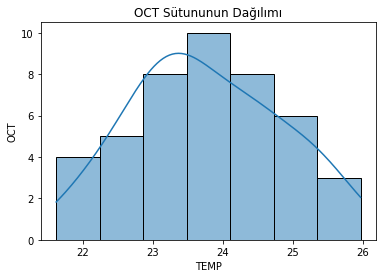

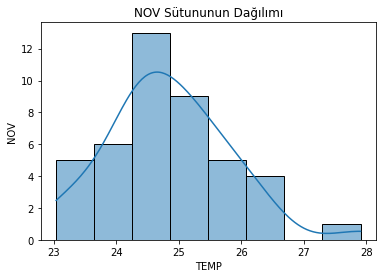

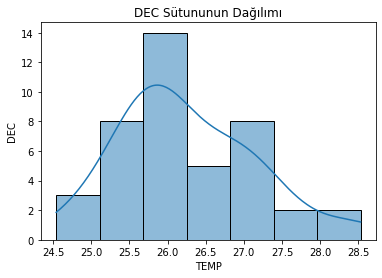

In [24]:
# Veri setindeki sütunların dağılımlarına bakın
for column in selected_df.columns:
    sns.histplot(selected_df[column], kde=True)
    plt.xlabel("TEMP")
    plt.ylabel(column)
    plt.title(f"{column} Sütununun Dağılımı")
    plt.show()

### farklı featurelarımız olsaydı onların sayısal değerlerinin özelliklerini bilmeden büyüklüklerine göre ağırlık vereceğinden  standardization veya normalization kullanarak devam etmemiz gerekir

In [25]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98


In [26]:
df.replace(np.nan, inplace = True)
df_interpolated = df.interpolate()
df_interpolated

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98


In [27]:
null_counts = df.isnull().sum()

total_null_values = df.isnull().sum().sum()

print(null_counts)

print("Total null values in the DataFrame:", total_null_values)

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64
Total null values in the DataFrame: 0


In [28]:
# Veri setini DataFrame'e dönüştürelim
df_interpolated = pd.DataFrame(df_interpolated)

selected_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Sadece istediğiniz sütunları içeren yeni bir DataFrame oluşturun
selected_df = df_interpolated[selected_columns]

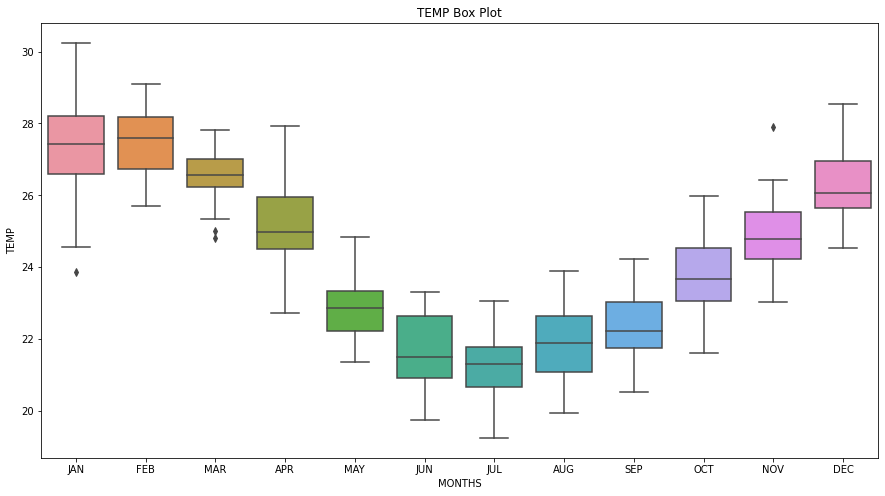

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data=selected_df)
plt.xlabel("MONTHS")
plt.ylabel("TEMP")
plt.title("TEMP Box Plot")
plt.show()

In [30]:
df_interpolated

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98


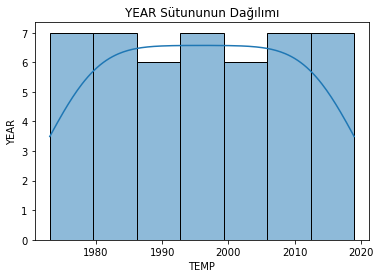

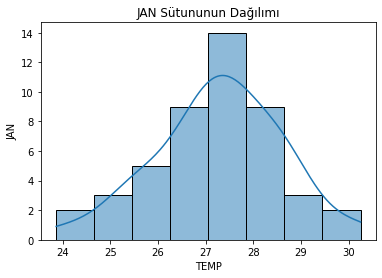

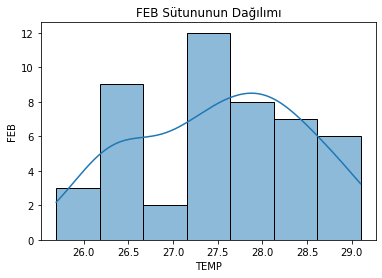

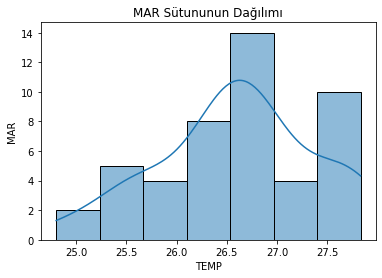

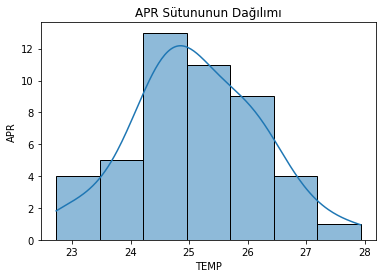

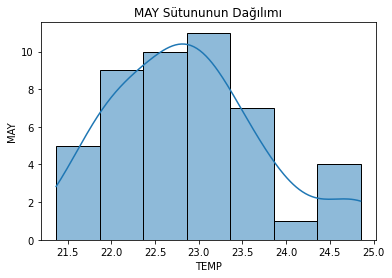

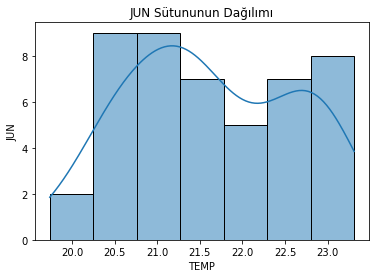

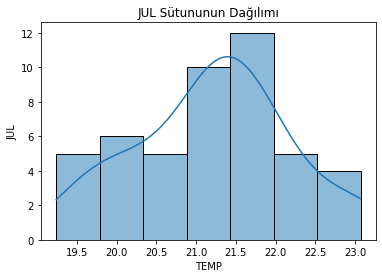

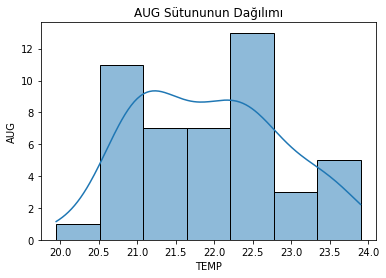

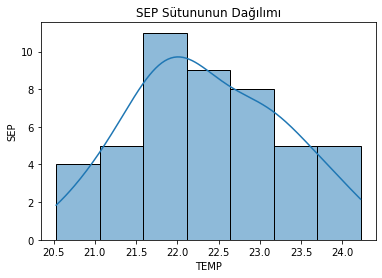

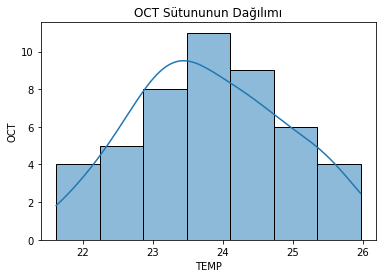

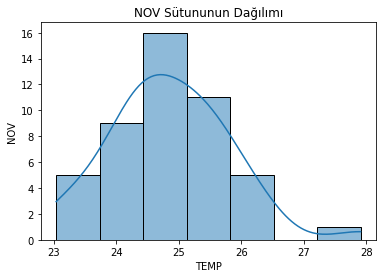

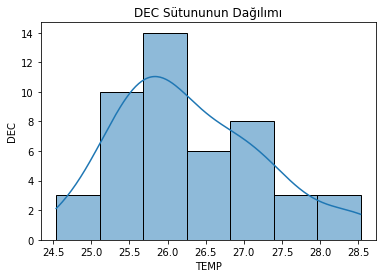

In [31]:
# Veri setindeki sütunların dağılımlarına bakın
for column in df_interpolated.columns:
    sns.histplot(df_interpolated[column], kde=True)
    plt.xlabel("TEMP")
    plt.ylabel(column)
    plt.title(f"{column} Sütununun Dağılımı")
    plt.show()

In [32]:
# ---- Data Transformations ----
months_dict = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,
               'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}

df_interpolated = df_interpolated[['YEAR'] + list(months_dict.keys())]
df_interpolated

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98


In [33]:
# ---melting---
df_interpolated = pd.melt(df_interpolated, 
        id_vars='YEAR',
        value_vars=months_dict.keys(),
        var_name='MONTH', 
        value_name='TEMP').replace({"MONTH": months_dict}) # replaces month names to month numbers.

In [34]:
df_interpolated

,YEAR,MONTH,TEMP
0,1973,1,27.73
1,1974,1,26.68
2,1975,1,25.27
3,1976,1,27.48
4,1977,1,27.13
...,...,...,...
559,2015,12,28.38
560,2016,12,27.22
561,2017,12,27.01
562,2018,12,27.55


In [35]:
# ---For datetime index---
df_interpolated["DAY"] = 1
df_interpolated['DATE'] = pd.to_datetime(df_interpolated[['YEAR','MONTH','DAY']])


In [36]:
df_interpolated

,YEAR,MONTH,TEMP,DAY,DATE
0,1973,1,27.73,1,1973-01-01
1,1974,1,26.68,1,1974-01-01
2,1975,1,25.27,1,1975-01-01
3,1976,1,27.48,1,1976-01-01
4,1977,1,27.13,1,1977-01-01
...,...,...,...,...,...
559,2015,12,28.38,1,2015-12-01
560,2016,12,27.22,1,2016-12-01
561,2017,12,27.01,1,2017-12-01
562,2018,12,27.55,1,2018-12-01


In [37]:
df_interpolated = df_interpolated.drop(["YEAR", "MONTH", "DAY"], axis = 1)

In [38]:
df_interpolated

,TEMP,DATE
0,27.73,1973-01-01
1,26.68,1974-01-01
2,25.27,1975-01-01
3,27.48,1976-01-01
4,27.13,1977-01-01
...,...,...
559,28.38,2015-12-01
560,27.22,2016-12-01
561,27.01,2017-12-01
562,27.55,2018-12-01


In [39]:
df_interpolated = df_interpolated.sort_values("DATE").reset_index(drop=True)
df_interpolated

,TEMP,DATE
0,27.73,1973-01-01
1,27.97,1973-02-01
2,25.70,1973-03-01
3,26.49,1973-04-01
4,22.42,1973-05-01
...,...,...
559,22.30,2019-08-01
560,23.05,2019-09-01
561,25.25,2019-10-01
562,25.61,2019-11-01


In [40]:
new_column_names = {
    'DATE': 'ds',
    'TEMP': 'y'
}

df_interpolated.rename(columns=new_column_names, inplace=True)


In [41]:
df_interpolated

,y,ds
0,27.73,1973-01-01
1,27.97,1973-02-01
2,25.70,1973-03-01
3,26.49,1973-04-01
4,22.42,1973-05-01
...,...,...
559,22.30,2019-08-01
560,23.05,2019-09-01
561,25.25,2019-10-01
562,25.61,2019-11-01


In [66]:
file_path = r"C:\Users\muham\Desktop\Python\Staj trial - Wiser Sense\Facebook Prophet Forcasting\cleaned_data.csv"
df_interpolated.to_csv(file_path, index=False)

In [61]:
X = df_interpolated[["ds"]]
y =df_interpolated[["y"]]

In [44]:
# Verileri train ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Burada test_size, test verisinin yüzdesini belirtir (örneğin, %20).
# random_state, verileri rastgele bölmek için kullanılan bir tohum değeridir ve her zaman aynı bölünmeyi elde etmek için kullanılır

In [45]:
model = Prophet()


In [46]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.rename(columns={'DATE': 'ds', 'TEMP': 'y'})
model.fit(train_data)

09:59:23 - cmdstanpy - INFO - Chain [1] start processing
09:59:26 - cmdstanpy - INFO - Chain [1] done processing
09:59:26 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
09:59:26 - cmdstanpy - INFO - Chain [1] start processing
09:59:26 - cmdstanpy - INFO - Chain [1] done processing
09:59:26 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\muham\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=98689 data file=C:\Users\muham\AppData\Local\Temp\tmpcf52iric\aex03d3s.json init=C:\Users\muham\AppData\Local\Temp\tmpcf52iric\olxkv_ft.json output file=C:\Users\muham\AppData\Local\Temp\tmpcf52iric\prophet_modeluaxm2ip6\prophet_model-20230801095926.csv method=optimize algorithm=newton iter=10000' failed: 

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.rename(columns={'DATE': 'ds', 'TEMP': 'y'})
forecast = model.predict(test_data)

In [ ]:
r2 = r2_score(y_test, forecast['yhat'])
mse = mean_squared_error(y_test, forecast['yhat'])
rmse = np.sqrt(mse)
print("r2 değeri:", r2)
print("MSE değeri:", mse)
print("RMSE değeri:", rmse)